# Introduction to Clustering

In [1]:
import sklearn
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

## Load Data Set 1

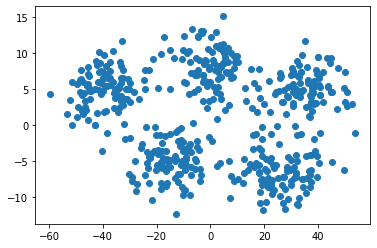

In [2]:
df = pd.read_csv('2D data.csv')
X1 = df.values
plt.scatter(X1[:, 0], X1[:, 1]);

### Visualize the Data

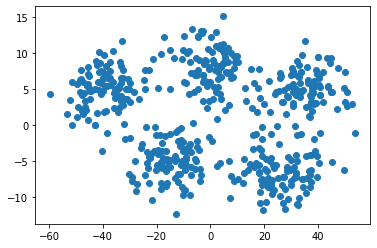

In [3]:
plt.scatter(X1[:, 0], X1[:, 1]);

(-60.0, 60.0)

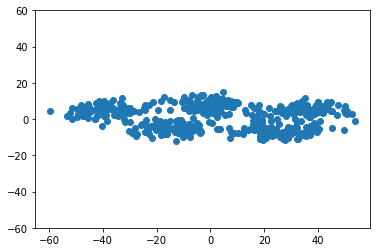

In [4]:
plt.scatter(X1[:, 0], X1[:, 1]);
plt.ylim(-60, 60)

## Sklearn Clustering

The Sklearn library proides a number of off the shelf clustering algorithms. Below are examples of 3 different ways to cluster data poins: 
1. Kmeans Clustering
2. Spectral clustering
3. Agglomerative or Hierarchical Clustering

We will first explore these 3 algorithms on the data set visualized above, and 2 other simple data sets below. The goal is to gain an understanding of the effectiveness and trade offs between the algorithms. Then we will move to another data set, which contains 15 dimensional data. There the goal will be to explore the Sklearn library and use it to practice clustering the data set using different algorithms. More information on the different clustering algorithms provided in the library can be found at:
https://scikit-learn.org/stable/modules/clustering.html#k-means

### Kmeans Clustering

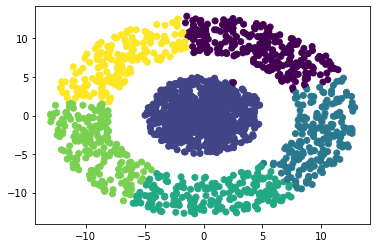

In [21]:
kmeans = cluster.KMeans(n_clusters=6)
kmeans.fit(X1)
y_predictions = kmeans.predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=y_predictions)

# Fix X1
# Add something for testing

### Spectral Clustering

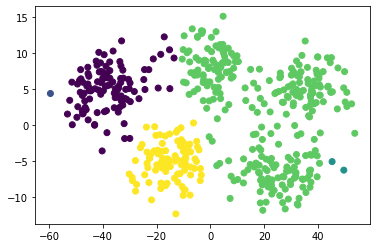

In [9]:
spectral = cluster.SpectralClustering(n_clusters = 5)
spectral.fit(X1)
y_predictions = spectral.fit_predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=y_predictions)

### Agglomerative Clustering

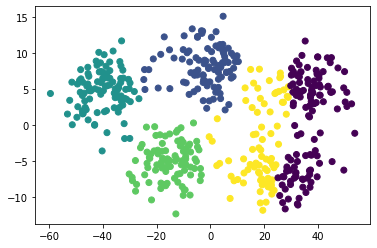

In [10]:
agglomerative = sklearn.cluster.AgglomerativeClustering(n_clusters = 5)
agglomerative.fit(X1)
y_predictions = agglomerative.labels_
plt.scatter(X1[:, 0], X1[:, 1], c=y_predictions)

## Additional Data Sets

Below we have simulated data sets that highlight the shortcomings of some of the above algorithms. These data sets are interesting because while it is easy to visualize them and identify the clusters, the overlapping nature in them makes it challenging for the algorithms to correctly separate them.

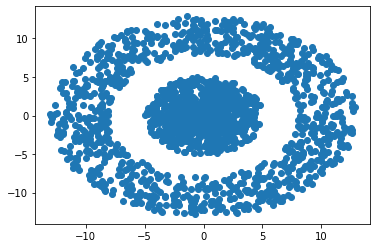

In [11]:
df = pd.read_csv('X1.csv')
X1 = df.values
plt.scatter(X1[:, 0], X1[:, 1]);

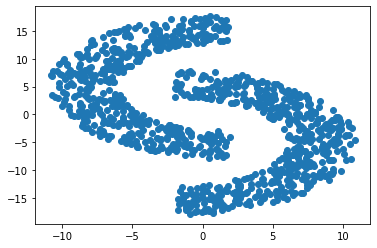

In [12]:
df = pd.read_csv('X2.csv')
X2 = df.values
plt.scatter(X2[:, 0], X2[:, 1]);

While there are clearly 2 distinct groups in both data sets above, separating them can becomes an interesting problem. In the cell below, choose a data set and one of the above clustering algorithsm (or another clustering method from the sklearn library) and see how it runs on these data sets.

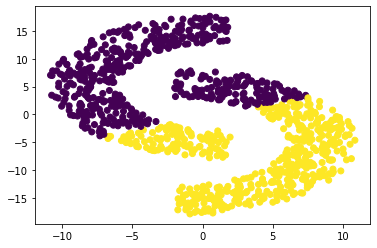

In [15]:
# Set the data set to X1 or X2
data = X2
# Fill in the clustering algorithm here. Make sure to give the argument (n_clusters=2)
model = cluster.KMeans(n_clusters=2)
# Have the model execute the clustering algorithm
model.fit(data)
# Get the cluster labels of each point
y_predictions = model.labels_
# Create a scatter plot based on the data
plt.scatter(data[:, 0], data[:, 1], c=y_predictions)

A great overview of clustering algorithms is given at: https://scikit-learn.org/stable/modules/clustering.html In the image below, it shows how a number of clustering algorithms will preform on different types of data sets. In the cell above, we did a similar experiment using data sets similar to the top 2 rows of this diagram. It's important to now that the run time of each algorithm on each data set is given in the bottom right corner. While Spectral CLustering is the best performing algorithm (of the 3 we have seen so far), it generally takes longer to run. 

![title](imgs/clustering_algorithm_comparisons.png)

# Exercise

Now that we have used 3 different clustering algorithms on this data set, we will continue by loading in data set 2, which contains 15 dimensional data. Once it is loaded and we analize the number of clusters, we should revisit the link above and explore the other clustering options provided in Sklearn.

https://scikit-learn.org/stable/modules/clustering.html

## Load Data Set 2

In [16]:
df = pd.read_csv('15D data.csv')
X2 = df.values

## Visualize the Data

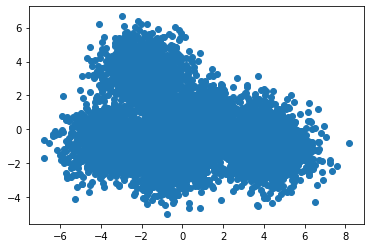

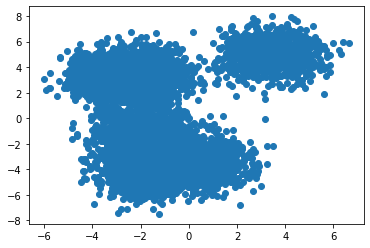

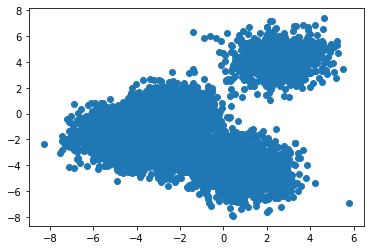

In [19]:
plt.figure(0)
plt.scatter(X2[:, 0], X2[:, 1]);
plt.figure(1)
plt.scatter(X2[:, 7], X2[:, 8]);
plt.figure(2)
plt.scatter(X2[:, 14], X2[:, 10]);

## Analyze the Number of Clusters

In data set 1, we were able to see the number of clusters in the data se by visually inspecting it. However, since we can't visualize 15 dimensional data, we must find another method for determining the correct number of clusters. One such method is to define a metric that is a measure of how good the clusters we form are. Using a metric like this, we can apply a clustering algorithm to the data set and measure which number of clusters is optimal. With the Davis-Bouldin metric, the optimal number of clusters has the lowest Davis-Bouldin score.

In the code below, we will do this with the Davis-Bouldin Clustering Metric, but Sklearn provides a number of other metrics which can similarly be used. More information can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html

Text(0.5, 1.0, 'Optimal Number of Clusters')

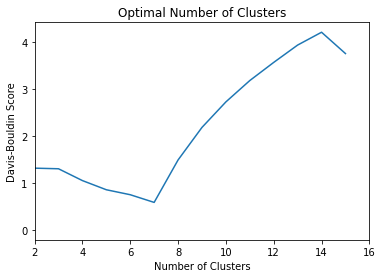

In [20]:
number_of_clusters = np.zeros(16)
davies_bouldin_score = np.zeros(16)
for i in range(2,len(number_of_clusters),1):
    number_of_clusters[i] = i
    kmeans = sklearn.cluster.KMeans(n_clusters=i)
    kmeans.fit(X2)
    labels = kmeans.labels_
    davies_bouldin_score[i] = sklearn.metrics.davies_bouldin_score(X2, labels)
    
plt.plot(number_of_clusters, davies_bouldin_score)
plt.xlim(2,16)
plt.xlabel("Number of Clusters")
plt.ylabel("Davis-Bouldin Score")
plt.title("Optimal Number of Clusters")

Using the optimal number of clusters we found able and any clustering algorithm provided in Sklearn, now cluster this data set.

In [ ]:
kmeans = sklearn.cluster.KMeans(n_clusters=7)
kmeans.fit(X2)
labels = kmeans.labels_
plt.scatter(X2[:, 0], X2[:, 1], labels);